## Bivariate Analysis

* Bivariate analysis is a statistical method that helps you study relationships (correlation) between data sets

### Quantitative vs. Quantitative
    1. Scatterplot
    2. Line plot

### Categorical vs. Quantitative
    1. Bar chart (on summary statistics)
    2. Grouped kernel density plots
    3. Box plots
    4. Violin plots


### Categorical vs. Categorical
    1. Stacked bar chart
    2. Grouped bar chart
    3. Segmented bar chart


## Case study 1


### Problem Feature:(Heart Disease)
# * Data Set: 

   * age - age in years 
   * sex - (1 = male; 0 = female) 
   * cp - chest pain type 
   * trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
   * chol - serum cholestoral in mg/dl 
   * fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
   * restecg - resting electrocardiographic results 
   * exang - exercise induced angina (1 = yes; 0 = no) 
   * oldpeak - ST depression induced by exercise relative to rest 
   * slope - the slope of the peak exercise ST segment 
   * ca - number of major vessels (0-3) colored by flourosopy 
   * thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
   * target - have disease or not (1=yes, 0=no)



### 1.1 Loading the libraries

In [41]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 import the dataset ?

In [58]:
data=pd.read_csv('heart.csv')
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


### 1.3 How to see the size of your data?

In [59]:
print("Train: rows:{} columns:{}".format(data.shape[0], data.shape[1]))

Train: rows:303 columns:14


### 1.4 How to view the statistical characteristics of the data?

In [60]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1.5 How to see just one column?

In [61]:
data['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

### 1.6 How to check the column names?

In [62]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### 1.7 Find the Numerical Features,Categorical Features, Alphanumeric Features?

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


#### Change the column names?

In [64]:
data.columns = ['Age', 'Sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [65]:
#Change the sex(0,1)=(female,male)
data['Sex'][data['Sex'] == 0] = 'female'
data['Sex'][data['Sex'] == 1] = 'male'

import warnings

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## 1.8 Categorical vs. Quantitative

    * Categorical: chest_pain_type, Sex, fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope,thalassemia
    * Numerical Features: Age (Continuous), resting_blood_pressure ,cholesterol,max_heart_rate_achieved,st_depression, num_major_vessels,target

### 1.8a) Create bar plot for showing Gender and target. And your Observation:

Percentage of females Heart Disease: 75.0
Percentage of males Heart Disease: 44.927536231884055


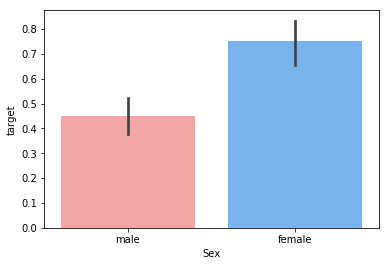

In [66]:
pal = {'male':"#ff9999", 'female':"#66b3ff"}
#draw a bar plot of target by sex
sns.barplot(x="Sex", y="target", data=data,palette = pal)

#print percentages of females vs. males Heart Disease
print("Percentage of females Heart Disease:", data["target"][data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males Heart Disease:", data["target"][data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

### Observation:

1. This bar plot above shows the distribution of female and male having Heart Disease. The x_label represents Sex feature while the y_label represents the % of Heart Disease. 
2. This bar plot shows that ~74% female Heart Disease while only ~44% male Heart Disease.

### 1.8b) Create Bar plot for checking the both target vs Sex. And your Observations?

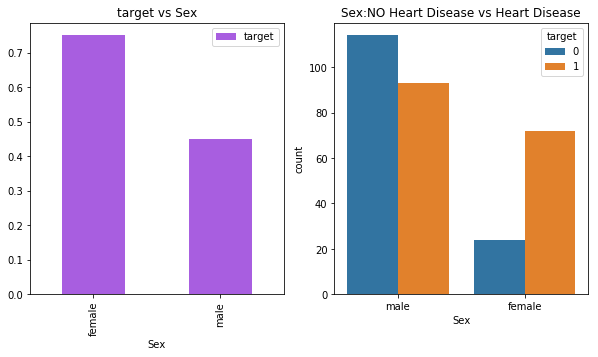

In [72]:
#create a subplot
f,ax=plt.subplots(1,2,figsize=(10,5))

# create bar plot using groupby
data[['Sex','target']].groupby(['Sex']).mean().plot.bar(color=['#a85ee0'],ax=ax[0])
ax[0].set_title('target vs Sex')

# create count plot
sns.countplot('Sex',hue='target',data=data,ax=ax[1])
ax[1].set_title('Sex:NO Heart Disease vs Heart Disease')
plt.show()

#### Observation:
    1. Most of the female having the Heart Disease compare to male.


### 1.8d) Create Bar plot for checking the both Number Of people having chest_pain_type vs chest_pain_type:Heart Disease or Not. And your Observations?

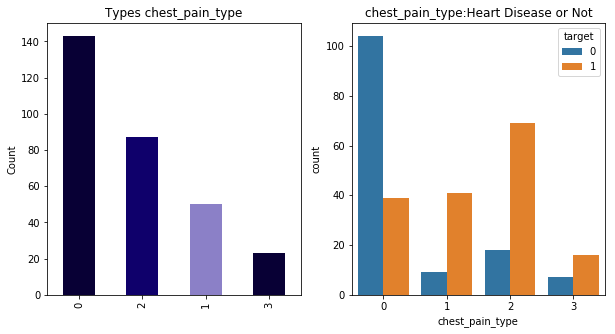

In [70]:
# create subplot plot
f,ax=plt.subplots(1,2,figsize=(10,5))

# create bar plot using groupby
data['chest_pain_type'].value_counts().plot.bar(color=['#080035','#0F006B','#8B80C7'],ax=ax[0])
ax[0].set_title('Types chest_pain_type')
ax[0].set_ylabel('Count')

# create count plot
sns.countplot('chest_pain_type',hue='target',data=data,ax=ax[1])
ax[1].set_title('chest_pain_type:Heart Disease or Not')
plt.show()

#### Observation:

    1. 0 = 'typical angina'
       1= 'atypical angina'
       2= 'non-anginal pain'
       3= 'asymptomatic'
    2. the person who dont have chest_pain also they have Heart Disease

### 1.8c) Create violinplot plot for checking the fasting_blood_sugar and Age vs target'. And your Observations?

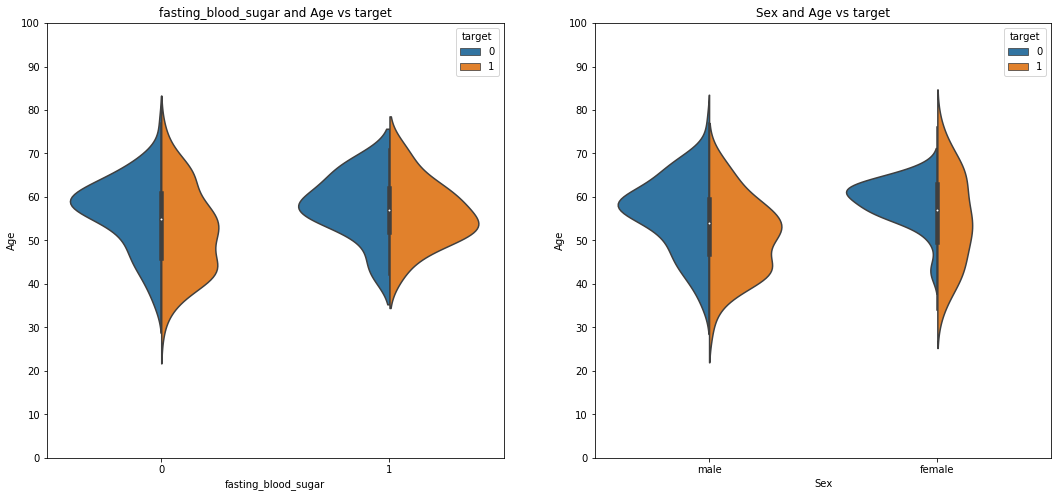

In [100]:
# create subplot plot

f,ax=plt.subplots(1,2,figsize=(18,8))

# create violinplot plot using groupby

sns.violinplot("fasting_blood_sugar","Age", hue="target", data=data,split=True,ax=ax[0])
ax[0].set_title('fasting_blood_sugar and Age vs target')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="target", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs target')
ax[1].set_yticks(range(0,110,10))
plt.show()


#### Observations:
    1. Males have the hight chance of getting the Heart Disease.
    2. Female have age at (25-90) they are getting Heart Disease

## Box Plot
a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, 

### 1.8 d)create a box plot for Sex & Age . And your Observations?

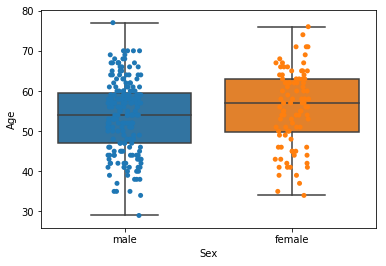

In [78]:
ax= sns.boxplot(x="Sex", y="Age", data=data)
ax= sns.stripplot(x="Sex", y="Age", data=data, jitter=True, edgecolor="gray")
plt.show()

### Observations: 
    1. box plot showing the spread is age over the SEX.
    2. Box plot 3 showing the no outliers.

# 1.9 Categorical vs. Categorical

* Categorical: target, Sex.

### Stacked bar chart

A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Different colors are used to illustrate the different categories in the bar.



### 1.9a) Create a Stacked bar chart for showing target & Sex. And your Observations?

Sex     female  male
target              
0           24   114
1           72    93


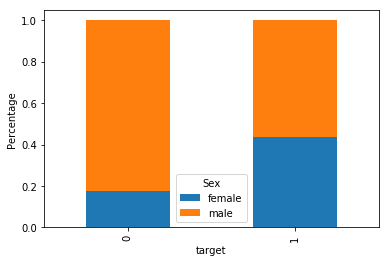

In [102]:
#create crosstab
tab = pd.crosstab(data['target'], data['Sex'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('target')
dummy = plt.ylabel('Percentage')

#### Observations:
    1. Now this is somewhat expected since it explains the difference between "Female" and male
    

# 1.10 Quantitative vs. Quantitative

    Numerical Features: Age, st_depression (Continuous)

### 1.10a) Create a scatter plot for showing age & st_depression. And your Observations?¶

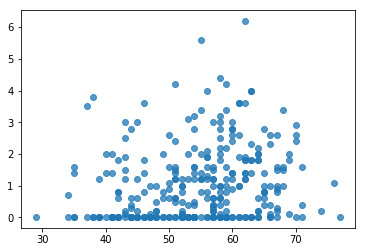

In [103]:

plt.scatter(data['Age'],data['st_depression'],alpha=0.75)
plt.show()

Observation:
    1. Scatter plot showing some relation but no use.

# 2. Seasonality and looking at trended data:


### 2. 1 Create a Seasonality and looking at trended data. And write your Observations?


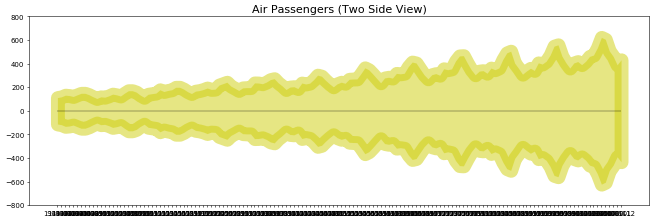

In [104]:
#Load the data = AirPassengers.csv

df = pd.read_csv('AirPassengers.csv')
x = df['Month'].values
y1 = df['#Passengers'].values

# Plot subplot 
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 50)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=20, color='#cece08')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.Month), xmax=np.max(df.Month), linewidth=.5)


Observations:
1. Since its a monthly time series and follows a certain repetitive pattern every year, you can plot each year as a separate line in the same plot. This lets you compare the year wise patterns side-by-side.

# THE END